In [23]:
#pip install /Users/qingchuanlyu/Documents/Conferences/ICML-2025/icml2025/code/mlrose

In [24]:
import mlrose_hiive as mh

In [25]:
help(mh.runners)

Help on package mlrose_hiive.runners in mlrose_hiive:

NAME
    mlrose_hiive.runners - Classes for running optimization problems.

PACKAGE CONTENTS
    _nn_runner_base
    _runner_base
    ga_border_check_front_runner
    ga_border_check_runner
    ga_js_border_check_simple_runner
    ga_js_runner
    ga_runner
    mimic_runner
    nngs_runner
    rhc_runner
    sa_runner
    skmlp_runner
    utils

FILE
    /Users/qingchuanlyu/anaconda3/envs/cs7641/lib/python3.10/site-packages/mlrose_hiive/runners/__init__.py




In [26]:
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML # for some notebook formatting.

import logging
import networkx as nx
import matplotlib.pyplot as plt
import string


from ast import literal_eval

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

# switch off the chatter
logging.basicConfig(level=logging.WARNING)

In [27]:
import pandas as pd
import importlib
import utility as u

In [28]:
class Task:
    def __init__(self, task_id, duration, deadline, profit):
        self.task_id = task_id
        self.duration = duration
        self.deadline = deadline
        self.profit = profit

In [29]:
size = 10
importlib.reload(u)
tasks = u.generate_random_tasks(size, 5, 80, 25)

In [30]:

with open(f"{size}_tasks.txt", "a") as f:
    for t in tasks:
        print(t.task_id, t.duration, t.deadline, t.profit, file=f)


In [31]:
# # Job Scheduling
problem_ffp = mh.JobSchedulingGenerator().generate(seed=0, size=size, tasks=tasks, break_time=1, work_limit=2)
#state = problem_ffp.get_state()

In [32]:
problem_ffp.length

10

In [33]:
problem_ffp.fitness

114.0

In [34]:
# GAJ runner class
# 1. tune population size and mutation rates
ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=0,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[2, 4, 5],
              mutation_rates=[0.1, 0.08]) # Probability of a mutation at each element of the state vector during reproduction, expressed as a value between 0 and 1.

# the two data frames will contain the results
df_run_stats_ffp, df_run_curves_ffp = ga_ffp.run()

In [35]:
df_run_curves_ffp.shape

(7322, 7)

In [36]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000481,88.0,0.0,2,0.1,2048
1,1,0.008063,122.0,2.0,2,0.1,2048
2,2,0.015141,122.0,3.0,2,0.1,2048
3,3,0.022772,122.0,4.0,2,0.1,2048
4,4,0.023471,122.0,5.0,2,0.1,2048


In [37]:
df_run_curves_ffp['Fitness'].max()

230.0

In [38]:
df_run_curves_ffp[df_run_curves_ffp.Fitness == df_run_curves_ffp['Fitness'].max()]

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
2812,501,0.648581,230.0,517.0,4,0.10,2048
2813,502,0.649714,230.0,518.0,4,0.10,2048
2814,503,0.650626,230.0,519.0,4,0.10,2048
2815,504,0.651509,230.0,520.0,4,0.10,2048
2816,505,0.652423,230.0,521.0,4,0.10,2048
...,...,...,...,...,...,...,...
7317,1437,0.651109,230.0,1456.0,5,0.08,2048
7318,1438,0.651700,230.0,1457.0,5,0.08,2048
7319,1439,0.652572,230.0,1458.0,5,0.08,2048
7320,1440,0.655885,230.0,1459.0,5,0.08,2048


In [39]:
# need to check Time and FEvals

In [40]:
df_curves_bestfitness_ffp = df_run_curves_ffp[(df_run_curves_ffp['Fitness'] == df_run_curves_ffp['Fitness'].max())]

In [41]:
df_curves_bestfitness_ffp

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
2812,501,0.648581,230.0,517.0,4,0.10,2048
2813,502,0.649714,230.0,518.0,4,0.10,2048
2814,503,0.650626,230.0,519.0,4,0.10,2048
2815,504,0.651509,230.0,520.0,4,0.10,2048
2816,505,0.652423,230.0,521.0,4,0.10,2048
...,...,...,...,...,...,...,...
7317,1437,0.651109,230.0,1456.0,5,0.08,2048
7318,1438,0.651700,230.0,1457.0,5,0.08,2048
7319,1439,0.652572,230.0,1458.0,5,0.08,2048
7320,1440,0.655885,230.0,1459.0,5,0.08,2048


In [42]:
df_curves_bestfitness_ffp.groupby(['Population Size', 'Mutation Rate']).agg({'FEvals': 'min', 'Iteration': 'mean', 'Time': 'min'}).reset_index()
# Temp = 1 => less Fevals. Pick temp=1

,Population Size,Mutation Rate,FEvals,Iteration,Time
0,4,0.08,960.0,1191.0,0.000290
1,4,0.10,517.0,751.0,0.648581
2,5,0.08,960.0,1191.0,0.000290
3,5,0.10,641.0,874.0,0.955939


In [43]:
# tentatively, pick pop size = 4 and mutation_rate = 0.1

In [44]:
df_run_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000481,88.0,0.0,2,0.1,2048
1,1,0.008063,122.0,2.0,2,0.1,2048
2,2,0.015141,122.0,3.0,2,0.1,2048
3,3,0.022772,122.0,4.0,2,0.1,2048
4,4,0.023471,122.0,5.0,2,0.1,2048


In [45]:
# clean up an existing result table to store the iterative resutls
df_iter_curves_ffp = df_run_curves_ffp.drop(df_run_curves_ffp.index, inplace=False)

In [46]:
# GA runner
# 2. iterate through 10 seeds
for s in range(10):
    ga_ffp = mh.GARunner(problem=problem_ffp,
              experiment_name='ffp_ga_{s}',
              output_directory=None, # note: specify an output directory to have results saved to disk
              seed=s,
              iteration_list=2 ** np.arange(12),
              max_attempts=500,
              population_sizes=[4], # 20 bits in total
              mutation_rates=[0.1])

    # the two data frames will contain the results
    df_run_stats_ffp_sub, df_run_curves_ffp_sub = ga_ffp.run()
    # append to the result df
    df_iter_curves_ffp = pd.concat([df_iter_curves_ffp, df_run_curves_ffp_sub])

In [47]:
df_iter_curves_ffp.shape

(12585, 7)

In [48]:
df_iter_curves_ffp.head()

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.000458,88.0,0.0,4,0.1,2048
1,1,0.006055,127.0,2.0,4,0.1,2048
2,2,0.013708,127.0,3.0,4,0.1,2048
3,3,0.024626,155.0,5.0,4,0.1,2048
4,4,0.027764,155.0,6.0,4,0.1,2048


In [49]:
df_iter_curves_ffp.Fitness.max()

230.0

In [50]:
df_iter_curves_ffp.to_csv(f'ga_js_{size}.csv')

In [1]:
import pandas as pd
import numpy as np
size = 10
df_iter_curves_ffp = pd.read_csv(f'../../csv-files/ga_js_{size}.csv')

In [51]:
df_iter_curves_ffp.Iteration.max()

1667

In [2]:
df_fitness_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_fitness=('Fitness', 'mean'), var_fitness = ('Fitness', 'var'))\
                                .reset_index()

In [53]:
df_fitness_iter_ffp.shape

(1668, 3)

In [54]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness
0,0,104.2,808.622222
1,1,129.5,88.944444
2,2,131.1,104.988889
3,3,134.6,138.044444
4,4,135.2,128.844444


In [55]:
# convergence point
df_iter_curves_ffp[df_iter_curves_ffp.Fitness == df_iter_curves_ffp.Fitness.max()].Iteration

501      501
502      502
503      503
504      504
505      505
        ... 
1169    1169
1170    1170
1171    1171
1172    1172
1173    1173
Name: Iteration, Length: 4008, dtype: int64

In [3]:
# converge point
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

1443

In [4]:
converge_iter = df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness >= df_iter_curves_ffp.Fitness.max()].Iteration.min()

In [57]:
df_fitness_iter_ffp['stddev_fitness'] = df_fitness_iter_ffp['var_fitness'].apply(np.sqrt)

In [58]:
df_fitness_iter_ffp.head()

,Iteration,avg_fitness,var_fitness,stddev_fitness
0,0,104.2,808.622222,28.436284
1,1,129.5,88.944444,9.431036
2,2,131.1,104.988889,10.246409
3,3,134.6,138.044444,11.749232
4,4,135.2,128.844444,11.350967


Text(0, 0.5, 'Fitness')

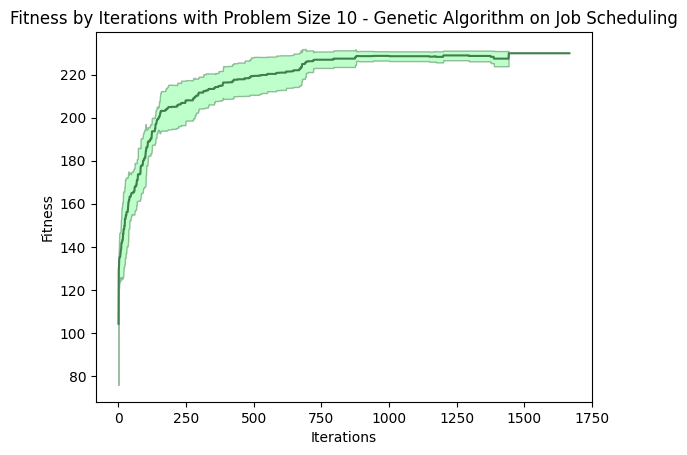

In [59]:
plt.plot(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness, 'k', color='#3F7F4C')
plt.fill_between(df_fitness_iter_ffp.Iteration, df_fitness_iter_ffp.avg_fitness - df_fitness_iter_ffp.stddev_fitness\
                 , df_fitness_iter_ffp.avg_fitness + df_fitness_iter_ffp.stddev_fitness\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title(f'Fitness by Iterations with Problem Size {size} - Genetic Algorithm on Job Scheduling')
plt.xlabel('Iterations')
plt.ylabel('Fitness')

In [60]:
df_fitness_iter_ffp[df_fitness_iter_ffp.Iteration == 400].avg_fitness

400    216.4
Name: avg_fitness, dtype: float64

In [61]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].stddev_fitness.max()

(nan, nan)

In [62]:
df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.min(),df_fitness_iter_ffp[df_fitness_iter_ffp.avg_fitness == 178].Iteration.max()

(nan, nan)

In [63]:
df_fitness_iter_ffp.stddev_fitness.max()

28.43628355151605

In [64]:
df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()

19.649427472575375

In [65]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp.stddev_fitness.max()].Iteration,

(0    0
 Name: Iteration, dtype: int64,)

In [66]:
df_fitness_iter_ffp[df_fitness_iter_ffp.stddev_fitness == df_fitness_iter_ffp[df_fitness_iter_ffp['Iteration']>0].stddev_fitness.max()].Iteration

17    17
18    18
Name: Iteration, dtype: int64

In [67]:
# Fevals - iteration

In [5]:
df_FEvals_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_FEvals=('FEvals', 'mean'), var_FEvals = ('FEvals', 'var'))\
                                .reset_index()

In [69]:
df_FEvals_iter_ffp.shape

(1668, 3)

In [70]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals
0,0,0.0,0.000000
1,1,1.7,0.233333
2,2,3.0,0.666667
3,3,4.2,0.844444
4,4,5.3,0.677778


In [6]:
df_FEvals_iter_ffp['stddev_FEvals'] = df_FEvals_iter_ffp['var_FEvals'].apply(np.sqrt)

In [7]:
df_FEvals_iter_ffp[df_FEvals_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
1443,1443,1462.0,NaN,NaN


In [72]:
df_FEvals_iter_ffp['stddev_FEvals'].min(), df_FEvals_iter_ffp['stddev_FEvals'].max()

(0.0, 2.869378562220997)

In [73]:
df_FEvals_iter_ffp.head()

,Iteration,avg_FEvals,var_FEvals,stddev_FEvals
0,0,0.0,0.000000,0.000000
1,1,1.7,0.233333,0.483046
2,2,3.0,0.666667,0.816497
3,3,4.2,0.844444,0.918937
4,4,5.3,0.677778,0.823273


Text(0, 0.5, 'FEvals')

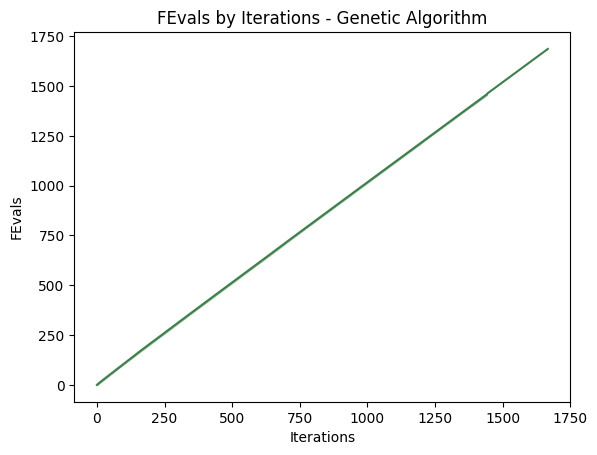

In [74]:
plt.plot(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals, 'k', color='#3F7F4C')
plt.fill_between(df_FEvals_iter_ffp.Iteration, df_FEvals_iter_ffp.avg_FEvals - df_FEvals_iter_ffp.stddev_FEvals\
                 , df_FEvals_iter_ffp.avg_FEvals + df_FEvals_iter_ffp.stddev_FEvals\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('FEvals by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('FEvals')

In [75]:
# fitness - wall clock time

In [8]:
df_time_iter_ffp = df_iter_curves_ffp.groupby('Iteration')\
                                .agg(avg_time=('Time', 'mean'), var_time = ('Time', 'var'))\
                                .reset_index()

In [77]:
df_time_iter_ffp.shape

(1668, 3)

In [78]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time
0,0,0.000331,4.629121e-08
1,1,0.003462,4.133388e-06
2,2,0.007174,1.251200e-05
3,3,0.012482,3.377860e-05
4,4,0.013355,4.279529e-05


In [9]:
df_time_iter_ffp['stddev_time'] = df_time_iter_ffp['var_time'].apply(np.sqrt)

In [80]:
df_time_iter_ffp.head()

,Iteration,avg_time,var_time,stddev_time
0,0,0.000331,4.629121e-08,0.000215
1,1,0.003462,4.133388e-06,0.002033
2,2,0.007174,1.251200e-05,0.003537
3,3,0.012482,3.377860e-05,0.005812
4,4,0.013355,4.279529e-05,0.006542


Text(0, 0.5, 'Time')

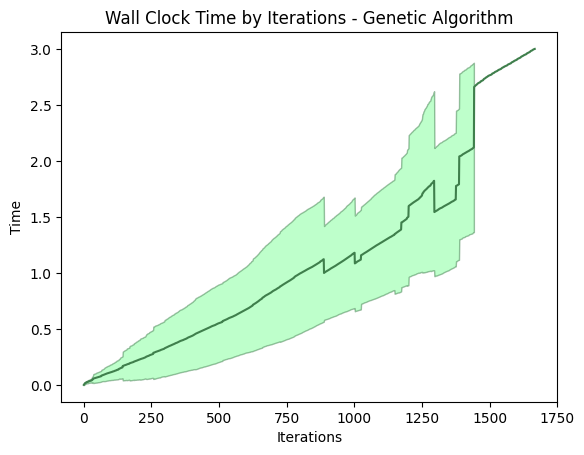

In [81]:
plt.plot(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time, 'k', color='#3F7F4C')
plt.fill_between(df_time_iter_ffp.Iteration, df_time_iter_ffp.avg_time - df_time_iter_ffp.stddev_time\
                 , df_time_iter_ffp.avg_time + df_time_iter_ffp.stddev_time\
                 , alpha=0.5, edgecolor='#3F7F4C', facecolor='#7EFF99')
plt.title('Wall Clock Time by Iterations - Genetic Algorithm')
plt.xlabel('Iterations')
plt.ylabel('Time')

In [82]:
df_time_iter_ffp.stddev_time.max()

0.8003613568833838

In [83]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == 501]

,Iteration,avg_time,var_time,stddev_time
501,501,0.553204,0.120188,0.346682


In [10]:
df_time_iter_ffp[df_time_iter_ffp['Iteration'] == converge_iter]

,Iteration,avg_time,var_time,stddev_time
1443,1443,2.663216,NaN,NaN


In [84]:
df_time_iter_ffp[df_time_iter_ffp.stddev_time == df_time_iter_ffp.stddev_time.max()].Iteration

1295    1295
Name: Iteration, dtype: int64

In [85]:
# maybe look at how std dev decrease in bulks

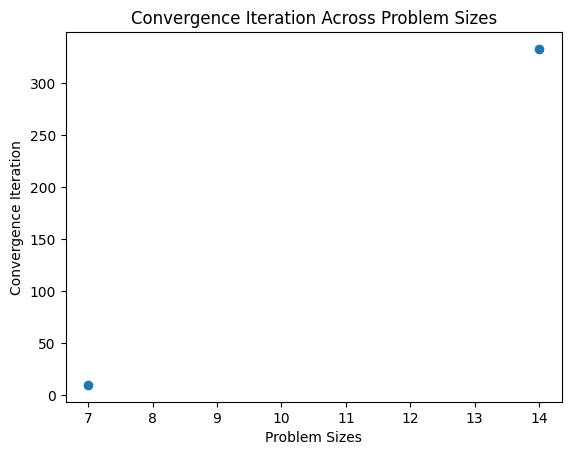

In [86]:
# scatter plot of convergent points across problem sizes
plt.scatter([7, 14], [10, 333])
plt.title('Convergence Iteration Across Problem Sizes')
plt.xlabel('Problem Sizes')
plt.ylabel('Convergence Iteration')
plt.show()